In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
import numpy as np
import pickle
import imageio.v2 as imageio

from birdseye import BirdsEye
from helpers import show_images, save_image, roi
from lanefilter import LaneFilter

In [2]:
calibration_data = pickle.load(open("calibration_data.p", "rb" ))

matrix = calibration_data['camera_matrix']
dist_coef = calibration_data['distortion_coefficient']

source_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
dest_points = [(320, 0), (320, 720), (960, 720), (960, 0)]

p = { 'sat_thresh': 120, 'light_thresh': 40, 'light_thresh_agr': 205,
      'grad_thresh': (0.7, 1.4), 'mag_thresh': 40, 'x_thresh': 20 }

birdsEye = BirdsEye(source_points, dest_points, matrix, dist_coef)
laneFilter = LaneFilter(p)

In [3]:
def lane_filter_test(path):
  img = imageio.imread(path)
  img = birdsEye.undistort(img)
  binary = laneFilter.apply(img)
  masked_lane = np.logical_and(birdsEye.sky_view(binary), roi(binary))
  sobel_img = birdsEye.sky_view(laneFilter.sobel_breakdown(img))
  color_img = birdsEye.sky_view(laneFilter.color_breakdown(img))
  show_images([color_img, sobel_img, masked_lane], per_row = 3, per_col = 1, W = 15, H = 5)

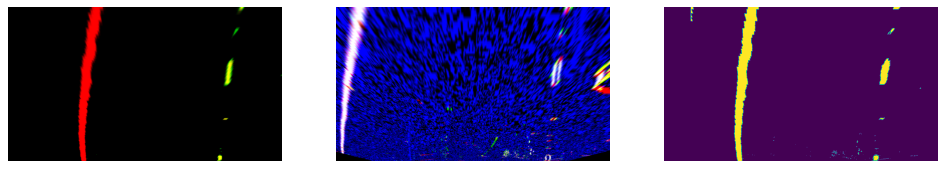

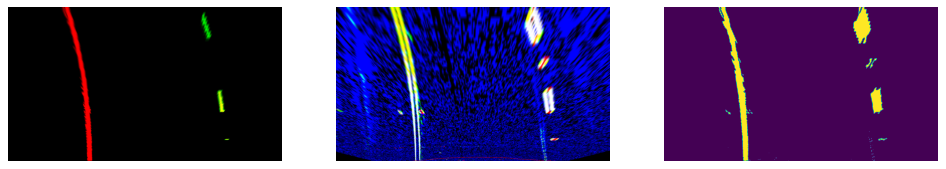

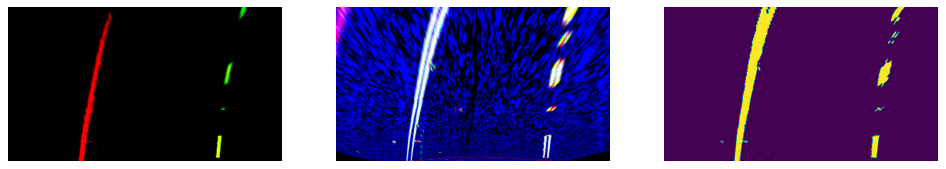

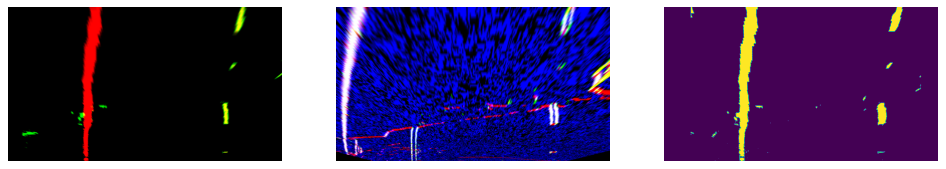

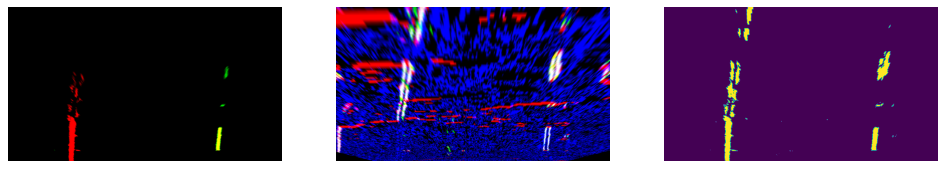

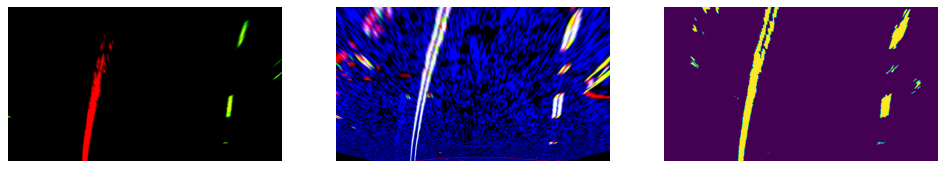

In [4]:
for i in range(1, 7):
  lane_filter_test("test_images/test" + str(i) + ".jpg")

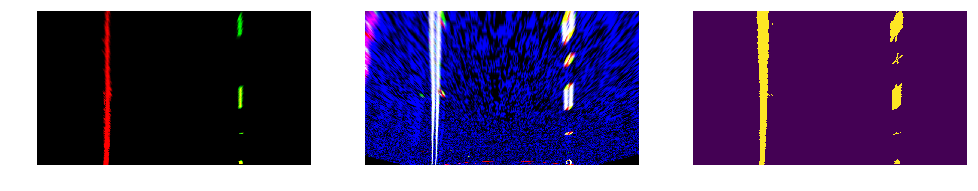

In [5]:
lane_filter_test("test_images/straight_lines1.jpg")

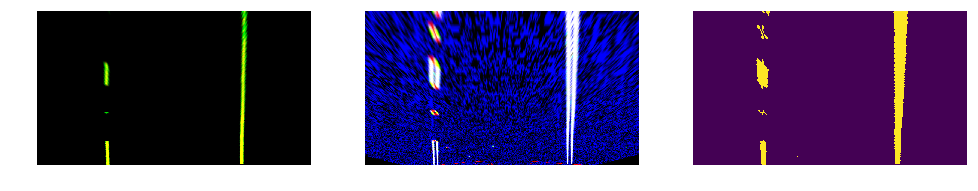

In [6]:
lane_filter_test("test_images/straight_lines2.jpg")